In [1]:
import numpy as np
import matplotlib.pyplot as plt
from module.mapGenerator import MapGenerator
from module.dictionary import Dictionary
import scipy.io as sio

# Map generation

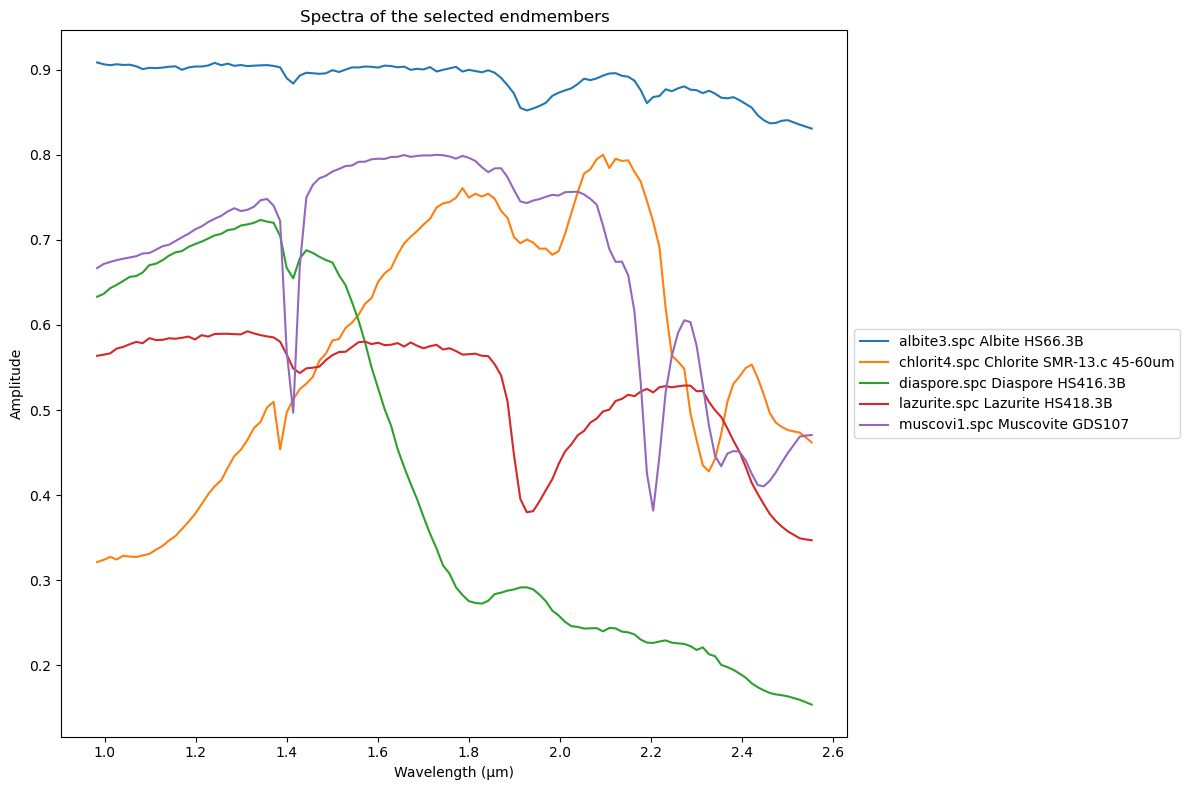

In [ ]:
h = 128 # height and width
k = 5 #number of endmembers selected in A
A = Dictionary("./spectra_USGS_ices_v2.mat")
M = MapGenerator(A, k=k, height=128, width=128, prop=3)
n = 50 # number of samples
Y_list = np.zeros((n, h, h, A.N))
Y_GT_list = np.zeros((n, h, h, A.N))
X_list = np.zeros((n, h, h, k))

for k in range(n):
    M.compute_maps()
    Y_list[k] = M.map_y
    Y_GT_list[k] = M.map_y_gt
    X_list[k] = M.map_x
    
plt.figure(figsize=(12, 8))
A.plot(M.element_indexes)

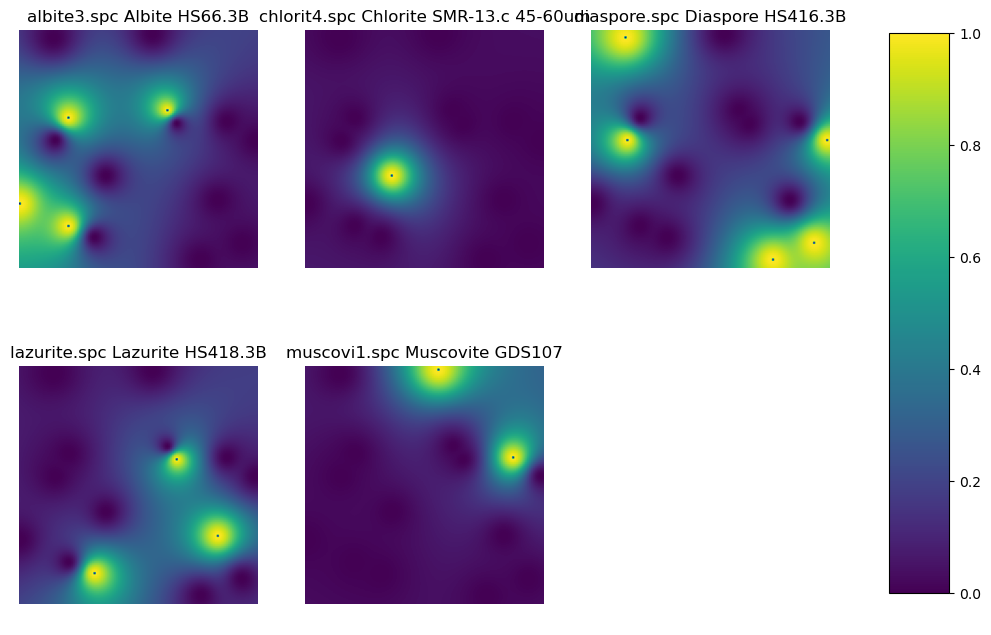

In [3]:
M.plot_x()

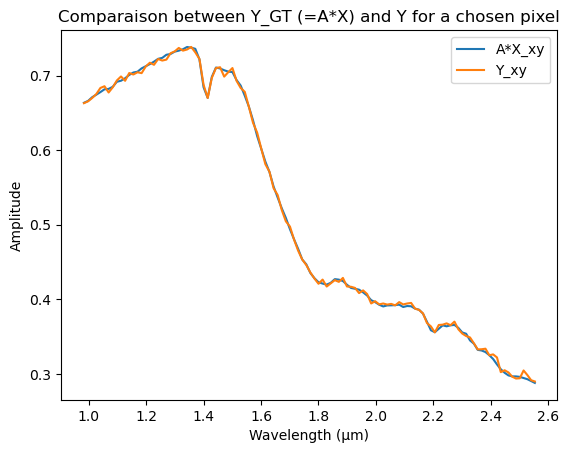

In [4]:
M.plot_y()

In [ ]:
sio.savemat(
    "./data/50x128x128.mat", 
    {
        "A": A.speclib[:, M.element_indexes],
        "wavelengths": A.wavelength,
        "mineral_names": np.array([A.mineral_names[k] for k in M.element_indexes]),
        "Y": Y_list,
        "X": X_list,
        "Y_GT": Y_GT_list
    }
)